In [ ]:
# Create Python package from Rust code
# maturin develop --release

In [ ]:
import benchmark_utils as benchmark_utils

/var/folders/6t/q5qz8h391z5glwmcphxhx9bm0000gn/T/ipykernel_88429/60516321.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGn")


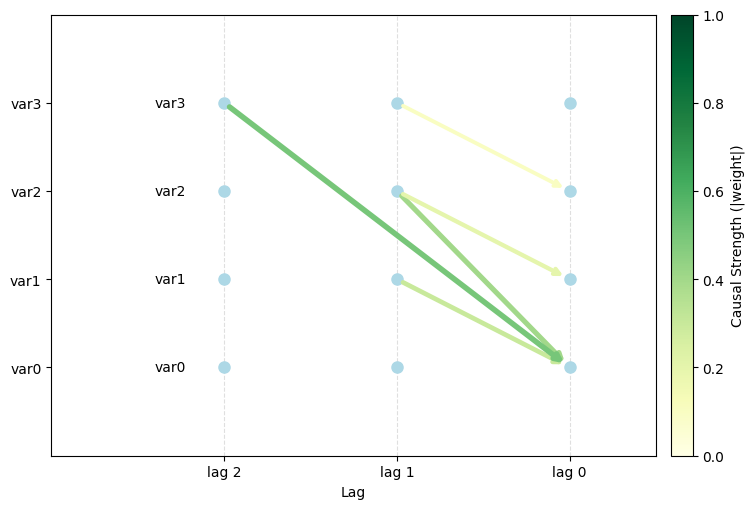

In [ ]:
var_names = [f"var{i}" for i in range(4)]
causal_edges = [
    # (orig, dest, lag, weight)
    ("var1", "var0", 1, 0.3),
    ("var2", "var0", 1, 0.4),
    ("var3", "var0", 2, 0.5),
    ("var2", "var1", 1, 0.2),
    ("var3", "var2", 1, 0.1),
]

causal_structure = benchmark_utils.build_causal_structure(causal_edges, var_names)
benchmark_utils.plot_lagged_causal_structure(causal_edges)

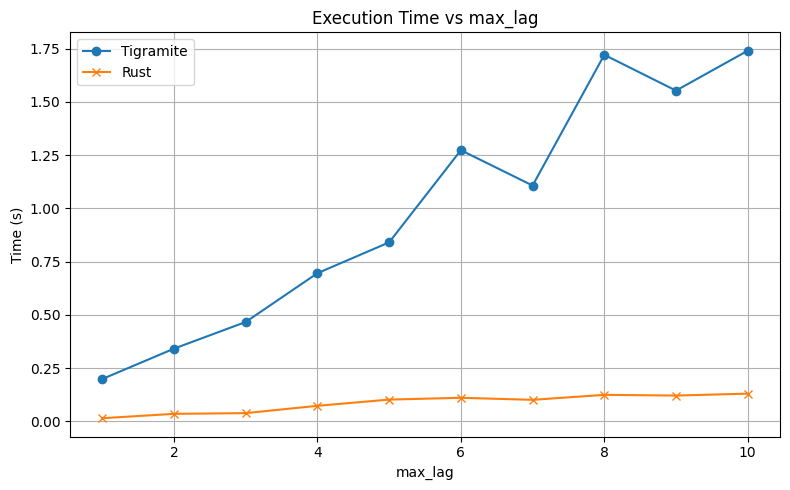

In [ ]:
causal_structure = {
    0: [(1, 1, 0.3), (2, 1, 0.4), (3, 2, 0.5)],
    1: [(2, 1, 0.2)],
    2: [(3, 1, 0.1)],
}

fixed_params = {
    # "max_lag": 2,
    "alpha": 0.05,
    "cond_size": 3,
    "subsets": 1,
}

vary_lags = range(1,11)
df = benchmark_utils.benchmark_param("max_lag", vary_lags, n_time=10000, n_vars=5,
                            causal_structure=causal_structure, noise_level=0.05,
                            fixed_params=fixed_params)

benchmark_utils.plot_time_vs_param(df, "max_lag")

In [ ]:
# TODO: Use tqdm
# TODO: benchmark average times 5 runs

In [ ]:
# On average, each pair of corresponding elements in the two matrices differ by about x% of their combined magnitude.

In [6]:
df

,max_lag,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,1,0.199211,0.015142,0.010757,0.999959,0.999917
1,2,0.341767,0.035575,0.013695,0.999982,0.999976
2,3,0.467021,0.039028,0.000511,1.000000,1.000000
3,4,0.696012,0.073353,0.002405,1.000000,1.000000
4,5,0.840808,0.102531,0.001004,0.999999,0.999997
5,6,1.273391,0.110975,0.005464,0.999997,0.999996
6,7,1.107419,0.101416,0.003211,0.999999,0.999998
7,8,1.721139,0.124810,0.004164,0.999999,0.999998
8,9,1.553200,0.121484,0.001680,1.000000,0.999999
9,10,1.740490,0.130425,0.004180,0.999998,0.999997
